# 数据拟合与绘制

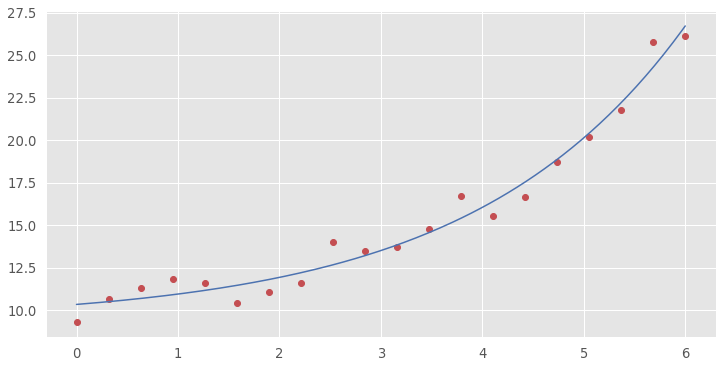

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('bmh')

## 用 NumPy 求解线性最小二乘拟合以及多项式拟合问题

### 一、线性最小二乘拟合

线性最小二乘拟合问题可以定义为一个含有 $m$ 个线性方程和 $n$ 个未知系数（$m>n$）的线性方程组。

用矩阵-向量表示可写为，

$$
\mathbf{X}=\left[\begin{array}{cccc}
x_{11} & x_{12} & \cdots & x_{1 n} \\
x_{21} & x_{22} & \cdots & x_{2 n} \\
\vdots & \vdots & \ddots & \vdots \\
x_{m 1} & x_{m 2} & \cdots & x_{m n}
\end{array}\right], \quad \mathbf{\beta}=\left[\begin{array}{c}
\beta_{1} \\
\beta_{2} \\
\vdots \\
\beta_{n}
\end{array}\right], \quad \mathbf{y}=\left[\begin{array}{c}
y_{1} \\
y_{2} \\
\vdots \\
y_{m}
\end{array}\right].
$$

令 $X$ 中的第 $i$ 行为 ${\bf x}_i^{\top}$，则有

$$
{y}_i=\mathbf{\beta}^{\top} {\bf x}_i+\mathbf{c}_i
$$

但问题是现在我们并不知道参数 $\beta$。
为了获得最佳的参数估计，需要求解如下最小化问题

$$
\mathbf{\hat{\beta}}=\underset{\beta}{\operatorname{argmin}}\|\mathbf{y}-\mathbf{X} \mathbf{\beta}\|^{2}
$$

$$
\|\mathbf{y}-\mathbf{X} \mathbf{\beta}\|^{2} = (\mathbf{y}-\mathbf{X} \mathbf{\beta})^{\top}(\mathbf{y}-\mathbf{X} \mathbf{\beta})
$$

最终转化为求解如下法方程，

$$
\mathbf{\hat{\beta}}=\left(\mathbf{X}^{\top} \mathbf{X}\right)^{-1} \mathbf{X}^{\top} \mathbf{y}
$$

1、先创建一个带噪声的数据。

In [2]:
f = np.poly1d([5, 1])

x = np.linspace(0, 10, 30)

np.random.seed(10)
y = f(x) + 6*np.random.normal(size=len(x))
xn = np.linspace(0, 10, 200)

2、以散点图形式绘制数据

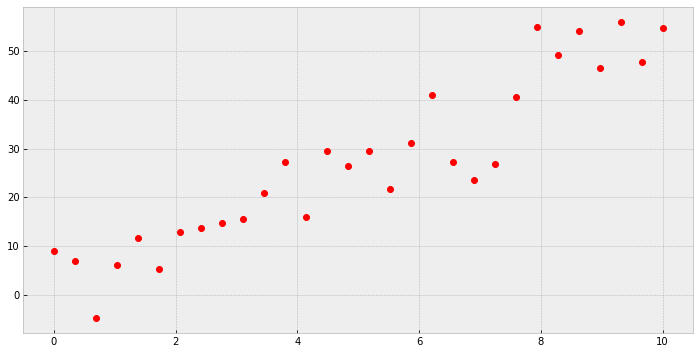

In [3]:
plt.figure(figsize=(12, 6))

plt.plot(x, y, 'or')
plt.show()

3、直接求解法

**直接求解法一**: 法方程

In [4]:
A = np.vstack([x, np.ones(len(x))]).T

np.dot(np.linalg.inv(np.dot(A.T, A)), np.dot(A.T, y))

array([5.26754223, 0.85023719])

In [5]:
A

array([[ 0.        ,  1.        ],
       [ 0.34482759,  1.        ],
       [ 0.68965517,  1.        ],
       [ 1.03448276,  1.        ],
       [ 1.37931034,  1.        ],
       [ 1.72413793,  1.        ],
       [ 2.06896552,  1.        ],
       [ 2.4137931 ,  1.        ],
       [ 2.75862069,  1.        ],
       [ 3.10344828,  1.        ],
       [ 3.44827586,  1.        ],
       [ 3.79310345,  1.        ],
       [ 4.13793103,  1.        ],
       [ 4.48275862,  1.        ],
       [ 4.82758621,  1.        ],
       [ 5.17241379,  1.        ],
       [ 5.51724138,  1.        ],
       [ 5.86206897,  1.        ],
       [ 6.20689655,  1.        ],
       [ 6.55172414,  1.        ],
       [ 6.89655172,  1.        ],
       [ 7.24137931,  1.        ],
       [ 7.5862069 ,  1.        ],
       [ 7.93103448,  1.        ],
       [ 8.27586207,  1.        ],
       [ 8.62068966,  1.        ],
       [ 8.96551724,  1.        ],
       [ 9.31034483,  1.        ],
       [ 9.65517241,

**直接求解法二**: 矩阵 QR 分解法

如果 $\mathbf{Ax}=\mathbf{b}$ 是一个非一致系统（未知数的个数与方程个数不同），最小二乘解的法方程为，

$$
\mathbf{A}^{\top} \mathbf{A} \mathbf{x}=\mathbf{A}^{\top} \mathbf{b} \qquad (\star)
$$

令 $\mathbf{A}=\mathbf{Q R}$ 为 $\mathbf{QR}$ 分解。因为 $\mathbf{Q}$ 的列是一组标准正交基，所以它遵循了 $\mathbf{Q}^{\top} \mathbf{Q}=\mathbf{I}_{n}$，因此有

$$
\mathbf{A}^{\top} \mathbf{A}=(\mathbf{Q} \mathbf{R})^{\top}(\mathbf{Q} \mathbf{R})=\mathbf{R}^{\top} \mathbf{Q}^{\top} \mathbf{Q} \mathbf{R}=\mathbf{R}^{\top} \mathbf{R}
$$

因此，法方程 $(\star)$ 可以写成

$$
\mathbf{R}^{\top} \mathbf{R} \mathbf{x}=\mathbf{R}^{\top} \mathbf{Q}^{\top} \mathbf{b}
$$

$\mathbf{A}$ 是列满秩的矩阵，则 $\mathbf{R}^{\top}$ 是非奇异的，上式可简化为

$$
\mathbf{R x}=\mathbf{Q}^{\top} \mathbf{b} \qquad (\star\star)
$$

这是一个上三角系统，可以通过反向代换有效地求解。换句话说，求解最小二乘问题的大部分工作是计算 $\mathbf{A}$ 的 $\mathbf{QR}$ 分解。

最后得，

$$
\mathbf{x}=\mathbf{R}^{-1} \mathbf{Q}^{\top} \mathbf{b}=\left(\mathbf{A}^{\top} \mathbf{A}\right)^{-1} \mathbf{A}^{\top} \mathbf{b}
$$

它是线性方程组的 $\mathbf{A x}=\mathbf{b}$ 的解，同时也是超定方程组的最小二乘解。

In [6]:
Q, R = np.linalg.qr(A)
np.dot(np.linalg.inv(R), np.dot(Q.T, y))

array([5.26754223, 0.85023719])

In [7]:
Q.shape, R.shape

((30, 2), (2, 2))

In [8]:
R

array([[-31.89422172,  -4.70304625],
       [  0.        ,  -2.80737527]])

### 课堂练习

**直接求解法三**：SVD 求解法方程

如果 $\mathbf{Ax}=\mathbf{b}$ 是一个非一致系统（未知数的个数与方程个数不同），最小二乘解的法方程为，

$$
\mathbf{A}^{\top} \mathbf{A} \mathbf{x}=\mathbf{A}^{\top} \mathbf{b} \qquad (\star)
$$

令 $\mathbf{A}=\mathbf{U\Sigma V}^{\top}$ 为 $\mathbf{SVD}$ 分解，有

$$
。。。
$$


In [41]:
U, S, V = np.linalg.svd(A)

In [44]:
?

array([5.26754223, 0.85023719])

4、调用 `np.lstsq`

**np.linalg.lstsq**

Solves the equation: $\mathbf{A x} = \mathbf{b}$ by computing a vector $\mathbf{x}$ that
minimizes the squared Euclidean 2-norm: $\| \mathbf{b} - \mathbf{a x} \|^2_2$.


**参数**

- a : (M, N) array_like
    "Coefficient" matrix.

- b : {(M,), (M, K)} array_like
    Ordinate or "dependent variable" values. If `b` is two-dimensional,
    the least-squares solution is calculated for each of the `K` columns
    of `b`.

    
**返回值**

- x : {(N,), (N, K)} ndarray
    Least-squares solution. If `b` is two-dimensional,
    the solutions are in the `K` columns of `x`.
    
- residuals : {(1,), (K,), (0,)} ndarray
    Sums of residuals; squared Euclidean 2-norm for each column in
    ``b - a*x``.
    If the rank of `a` is < N or M <= N, this is an empty array.
    If `b` is 1-dimensional, this is a (1,) shape array.
    Otherwise the shape is (K,).

- rank : int
    Rank of matrix `a`.

- s : (min(M, N),) ndarray
    Singular values of `a`.    

In [9]:
np.linalg.lstsq(A, y, rcond=None)[0]

array([5.26754223, 0.85023719])

5、使用 polynomial 模块

In [10]:
np.polyfit(x, y, 1)

array([5.26754223, 0.85023719])

**最小二乘多项式拟合** np.polyfit

- Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg` to points `(x, y)`. 

- Returns a vector of coefficients `p` that minimises the squared error in the order `deg`, `deg-1`, ... `0`.

**参数**

- x : array_like, shape (M,)
    x-coordinates of the M sample points ``(x[i], y[i])``.
- y : array_like, shape (M,) or (M, K)
    y-coordinates of the sample points. Several data sets of sample
    points sharing the same x-coordinates can be fitted at once by
    passing in a 2D-array that contains one dataset per column.
- deg : int
    Degree of the fitting polynomial

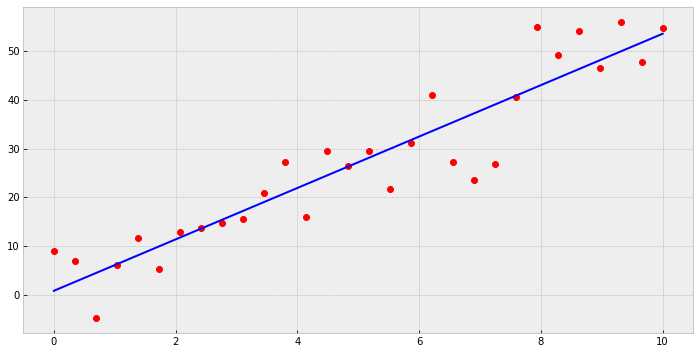

In [11]:
# 用 1 次多项式拟合数据
m, c = np.polyfit(x, y, 1)
yn = np.polyval([m, c], xn)

# 绘制数据点和拟合直线
plt.figure(figsize=(12, 6))
plt.plot(x, y, 'or')
plt.plot(xn, yn, '-b')
plt.show()

#### 四种方法性能对比

In [12]:
def leastsq1(x):
    A = np.vstack([x, np.ones(len(x))]).T
    return np.dot(np.linalg.inv(np.dot(A.T, A)), np.dot(A.T, y))

def leastsqr(x):
    A = np.vstack([x, np.ones(len(x))]).T
    Q, R = np.linalg.qr(A)
    return np.dot(np.linalg.inv(R), np.dot(Q.T, y))
    
def leastsq2(x):
    A = np.vstack([x, np.ones(len(x))]).T
    return np.linalg.lstsq(np.vstack([x, np.ones(len(x))]).T, y, rcond=None)[0]

def leastsq3(x):
    return np.polyfit(x, y, 1)

In [13]:
%timeit leastsq1(x)

The slowest run took 31.99 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 5: 17.7 µs per loop


In [14]:
%timeit leastsqr(x)

The slowest run took 17.02 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 49.8 µs per loop


In [15]:
%timeit leastsq2(x)

The slowest run took 5.66 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 32.8 µs per loop


In [16]:
%timeit leastsq3(x)

The slowest run took 4.70 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 47.8 µs per loop


### 二、多项式拟合

数据的不同维度之间不是线性关系的怎么办呢？

对于多项式函数，可以用与线性函数相同的方式进行拟合。下面让我们来试着拟合一个多项式函数。

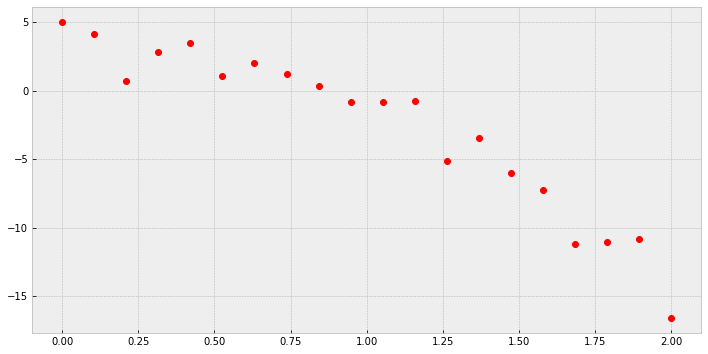

In [17]:
# 生成模拟数据
f = np.poly1d([-5, 1, 3])
x = np.linspace(0, 2, 20)
np.random.seed(10)
y = f(x) + 1.5*np.random.normal(size=len(x))
xn = np.linspace(0, 2, 200)

# 以三点图形式绘制模拟数据
plt.figure(figsize=(12, 6))
plt.plot(x, y, 'or')
plt.show()

#### 练习

用直线拟合上面数据

In [18]:
？

SyntaxError: invalid character in identifier (<ipython-input-18-1e23a4621bf1>, line 1)

In [ ]:
# 用 2 次多项式拟合数据
popt = np.polyfit(x, y, 2)
popt

In [ ]:
yn = np.polyval(popt, xn)

plt.figure(figsize=(12, 6))
plt.plot(x, y, 'or')
plt.plot(xn, yn, '-b')
plt.show()

In [ ]:
%timeit np.polyfit(x, y, 2)

## 用 SciPy 解非线性拟合问题

在本节中，我们需要提供待求参数的一个初始估计值 $\beta$，在每一步迭代中，该估计将被更新为 $\mathbf{\beta}+\mathbf{\delta}$，由

$$
\mathbf{f}\left(\mathbf{x}_{i}, \mathbf{\beta}+\mathbf{\delta}\right) \approx \mathbf{f}\left(\mathbf{x}_{i}, \beta\right)+\mathbf{J}_{i} \mathbf{\delta}
$$

其中，$\mathbf{J}_{i}$ 是代价函数关于未知数 $\mathbf{\beta}$ 的梯度。

在代价函数最小值处，该梯度为零，将得到未知系数 $\mathbf{\beta}$ 的最佳估计。用向量表示的话，得

$$
\underset{\mathbf{\beta}+\mathbf{\delta}}{\operatorname{argmin}}\|\mathbf{y}-\mathbf{f}(\mathbf{\beta})-\mathbf{J} \mathbf{\delta}\|^{2}=0
$$

这将通过以下方式求解，

$$
\left(\mathbf{J}^{\top} \mathbf{J}+\lambda \operatorname{diag}\left(\mathbf{J}^{\top} \mathbf{J}\right)\right) \mathbf{\delta}=\mathbf{J}^{\top}[\mathbf{y}-\mathbf{f}(\mathbf{\beta})]
$$

其中，$\mathbf{\lambda}$ 是阻尼因子，防止方程无解。

**我们将使用 Scipy 包中的优化模块 optimize 的非线性方法拟合数据。**

Scipy 的最小二乘函数使用 Levenberg-Marguardt 算法来解决非线性最小二乘问题。Levenberg-Marquardt 算法是找到局部最小值的一种迭代方法。

### 一、拟合多项式函数

In [ ]:
# 定义参数待求解的多项式函数
def f(x, a, b, c):
    return a*x**2 + b*x + c

# 定义优化求解器的残差函数
def residual(p, x, y):
    return y - f(x, *p)

# 用 leastsq 拟合
p0 = [1., 1., 1.]
popt, pcov = optimize.leastsq(residual, p0, args=(x, y))

popt

In [ ]:
yn = f(xn, *popt)

plt.figure(figsize=(12, 6))
plt.plot(x, y, 'or')
plt.plot(xn, yn, '-b')
plt.show()

In [ ]:
%timeit optimize.leastsq(residual, p0, args=(x, y))

### 练习

改用更高次函数拟合数据，比如八次多项式。

In [ ]:
？

### 二、拟合指数函数

下面我们不使用多项式函数，而是使用指数函数，因此必须使用非线性求解器来求解问题。

In [ ]:
# 定义一个指数函数
def f(x, b, c):
    return b**x+c

# 由上面函数产生带噪声随机数据
p = [1.6, 10]
x = np.linspace(0, 6, 20)
y = f(x, *p) + np.random.normal(size=len(x))
xn = np.linspace(0, 6, 200)

# 以散点图形式绘制数据
plt.figure(figsize=(12, 6))
plt.plot(x, y, 'or')
plt.show()

1、使用 optimize.leastsq 实现非线性最小二乘拟合

In [ ]:
# 定义残差函数，系数待求
def residual(p, x, y):
    return y - f(x, *p)

# 设置参数初始值并估计参数
p0 = [1., 8.]
popt, pcov = optimize.leastsq(residual, p0, args=(x, y))

print(popt)

yn = f(xn, *popt)

# 根据求得的估计值绘制曲线
plt.figure(figsize=(12, 6))
plt.plot(x, y, 'or')
plt.plot(xn, yn, '-b')
plt.show()

2、使用 optimize.curve_fit 实现非线性最小二乘拟合

非线性最小二乘拟合的更简单接口是直接使用 Scipy 的 `curve_fit`。非线性最小二乘拟合的更简单接口是直接使用 Scipy 的 `curve_fit`。

In [ ]:
popt, pcov = optimize.curve_fit(f, x, y)
popt

In [ ]:
yn = f(xn, *popt)

plt.figure(figsize=(12, 6))
plt.plot(x, y, 'or')
plt.plot(xn, yn, '-b')
plt.show()

#### 性能比较

In [ ]:
%timeit optimize.leastsq(residual, p0, args=(x, y))

In [ ]:
%timeit optimize.curve_fit(f, x, y, p0=p0)

### 三、拟合三角函数

这里模拟数据采样自三角函数，带噪声。

In [ ]:
def f(x, a, b):
    return a*np.sin(b*np.pi*x)

p = [5, 5]
x = np.linspace(0, 1, 30)
np.random.seed(10)
y = f(x, *p) + .5*np.random.normal(size=len(x))
xn = np.linspace(0, 1, 200)

plt.figure(figsize=(12, 6))
plt.plot(x, y, 'or')
plt.show()

用非线性最小二乘法拟合数据

In [ ]:
popt, pcov = optimize.curve_fit(f, x, y)
popt

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(x, y, 'or')
plt.plot(xn, f(xn, *popt), '-b')
plt.show()

我们得到一个非常差的拟合效果，这跟参数的初始估计值有关。

观察上面的数据，通过设置更好的初始估计值来改善拟合效果。

In [ ]:
p0 = [3, 4]
popt, pcov = optimize.curve_fit(f, x, y, p0=p0)
print(popt)

plt.figure(figsize=(12, 6))
plt.plot(x, y, 'or')
plt.plot(xn, f(xn, *popt), '-b')
plt.show()

不同函数的性能比较

In [32]:
%timeit optimize.leastsq(residual, p0, args=(x, y))

The slowest run took 4.32 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 163 µs per loop


In [33]:
%timeit optimize.curve_fit(f, x, y, p0=p0)

1000 loops, best of 5: 300 µs per loop


#### 二者区别

Scipy.optimize.leastsq vs Scipy.optimize.curve_fit

- 后者是前者的封装，使用参数 `method='lm'`，调用使用 Levenberg-Marquardt 算法的函数 `leastsq`。


- Scipy.optimize.leastsq 方便设置自定义的残差函数。